<a href="https://colab.research.google.com/github/Elkin77/heart-disease-classification/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:

#Librerias
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf
# import os
from google.colab import drive
import zipfile
#import cv2
#import glob
# from sklearn.utils import shuffle
# from keras.utils import plot_model


In [39]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [44]:
path = "/content/drive/MyDrive/Colab Notebooks/datasets/heart-disease-classification/dataset.zip"


In [45]:
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/dataset_model_1/")
zip_ref.close()

In [46]:
df = pd.read_csv("/tmp/dataset_model_1/heart.csv")

In [52]:
data_description = [
    {'Variable': 'Edad', 'Descripción': 'edad del paciente [años]'},
    {'Variable': 'Sexo', 'Descripción': 'sexo del paciente [M: Masculino, F: Femenino]'},
    {'Variable': 'ChestPainType', 'Descripción': 'tipo de dolor en el pecho [TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático]'},
    {'Variable': 'PA en reposo', 'Descripción': 'presión arterial en reposo [mm Hg]'},
    {'Variable': 'Colesterol', 'Descripción': 'colesterol sérico [mm/dl]'},
    {'Variable': 'FastingBS', 'Descripción': 'azúcar en sangre en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]'},
    {'Variable': 'ECG en reposo', 'Descripción': 'resultados del electrocardiograma en reposo [Normal: normal, ST: con anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV), HVI: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]'},
    {'Variable': 'MaxHR', 'Descripción': 'frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]'},
    {'Variable': 'EjercicioAngina', 'Descripción': 'angina inducida por el ejercicio [Y: Sí, N: No]'},
    {'Variable': 'Oldpeak', 'Descripción': 'oldpeak = ST [Valor numérico medido en depresión]'},
    {'Variable': 'ST_Slope', 'Descripción': 'la pendiente del segmento ST del ejercicio máximo [Arriba: ascendente, Plano: plano, Abajo: descendente]'},
    {'Variable': 'HeartDisease', 'Descripción': 'clase de salida [1: enfermedad cardíaca, 0: normal]'}
]

In [54]:
df_description = pd.DataFrame(data_description)

In [56]:
df_description

,Variable,Descripción
0,Edad,edad del paciente [años]
1,Sexo,"sexo del paciente [M: Masculino, F: Femenino]"
2,ChestPainType,"tipo de dolor en el pecho [TA: angina típica, ..."
3,PA en reposo,presión arterial en reposo [mm Hg]
4,Colesterol,colesterol sérico [mm/dl]
5,FastingBS,azúcar en sangre en ayunas [1: si FastingBS > ...
6,ECG en reposo,resultados del electrocardiograma en reposo [N...
7,MaxHR,frecuencia cardíaca máxima alcanzada [Valor nu...
8,EjercicioAngina,"angina inducida por el ejercicio [Y: Sí, N: No]"
9,Oldpeak,oldpeak = ST [Valor numérico medido en depresión]


In [57]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [58]:
df.shape[1]

12

In [50]:
total_ejemplos = df.shape[0]

In [51]:
total_ejemplos

918

In [61]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


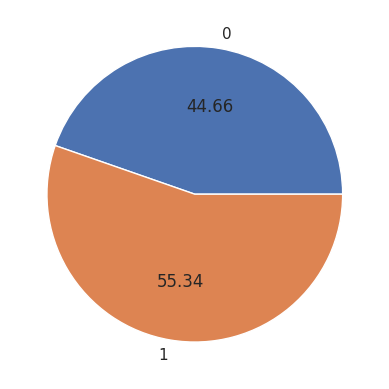

In [65]:
plt.pie(df.groupby(by=["HeartDisease"]).size(), labels = df["HeartDisease"].unique(), autopct = "%0.2f")
plt.show()

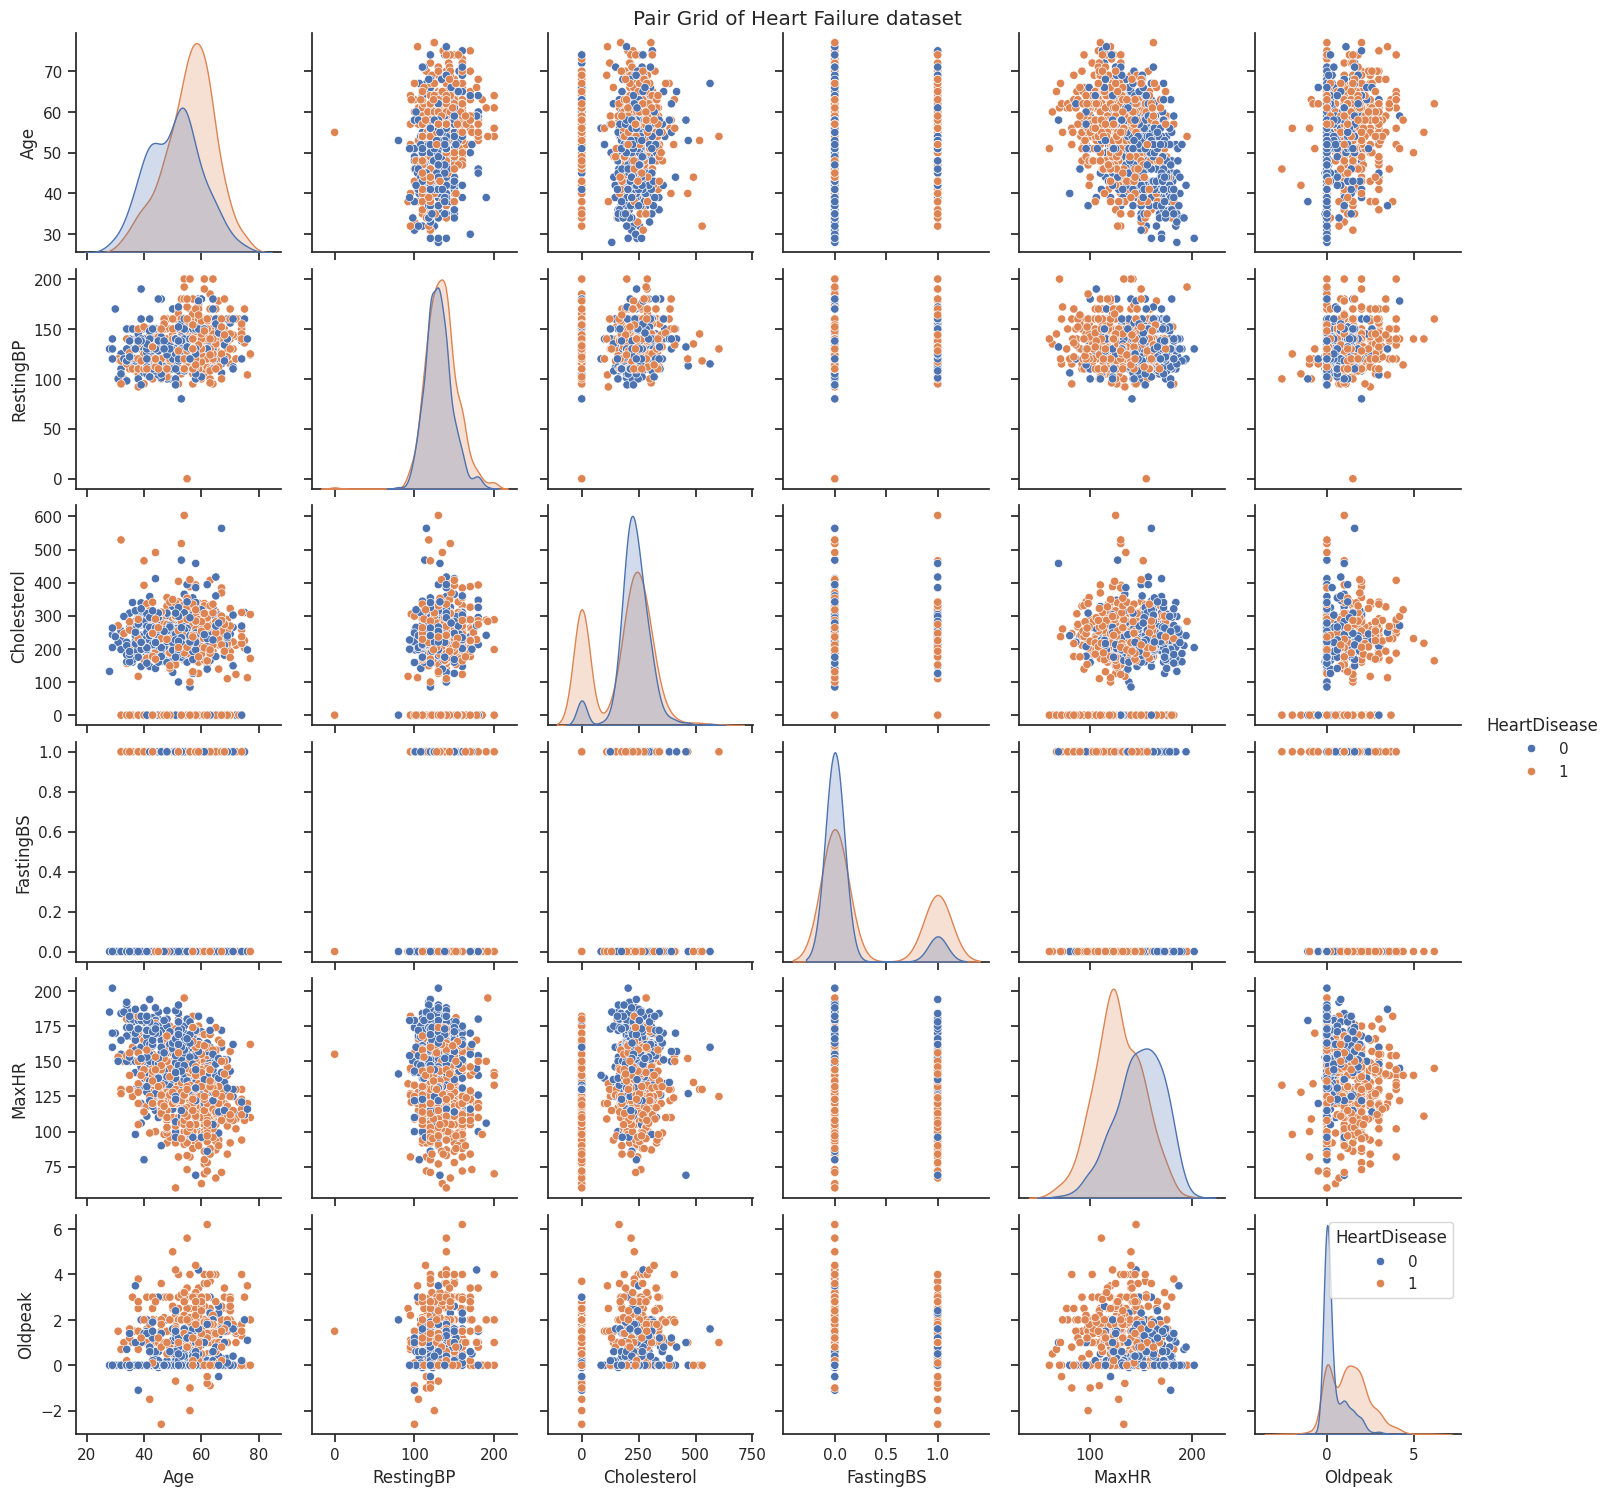

In [67]:
g= sns.pairplot(df, hue='HeartDisease')
plt.suptitle('Pair Grid of Heart Failure dataset', y=1)
handles = g._legend_data.values()
labels = g._legend_data.keys()
plt.legend(handles, labels, title='HeartDisease', loc='upper right')
plt.show();

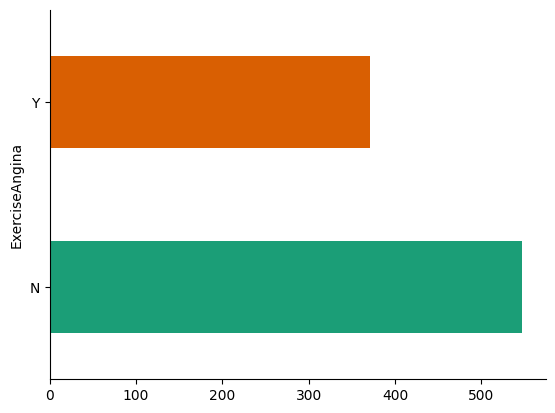

In [62]:
# @title ExerciseAngina

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ExerciseAngina').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

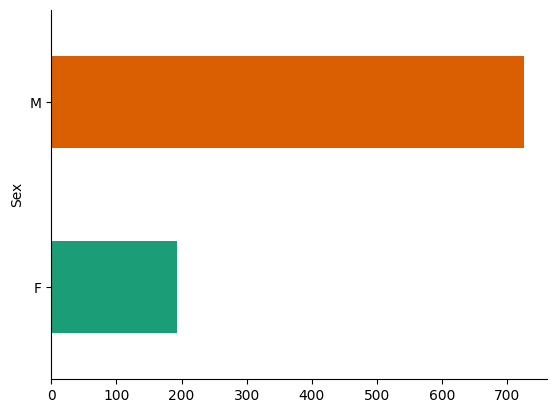

In [60]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

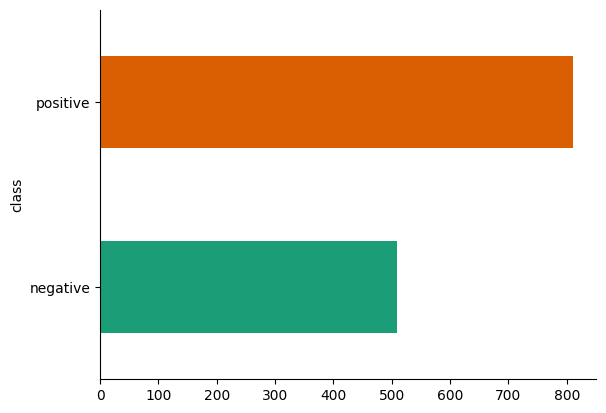

In [10]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

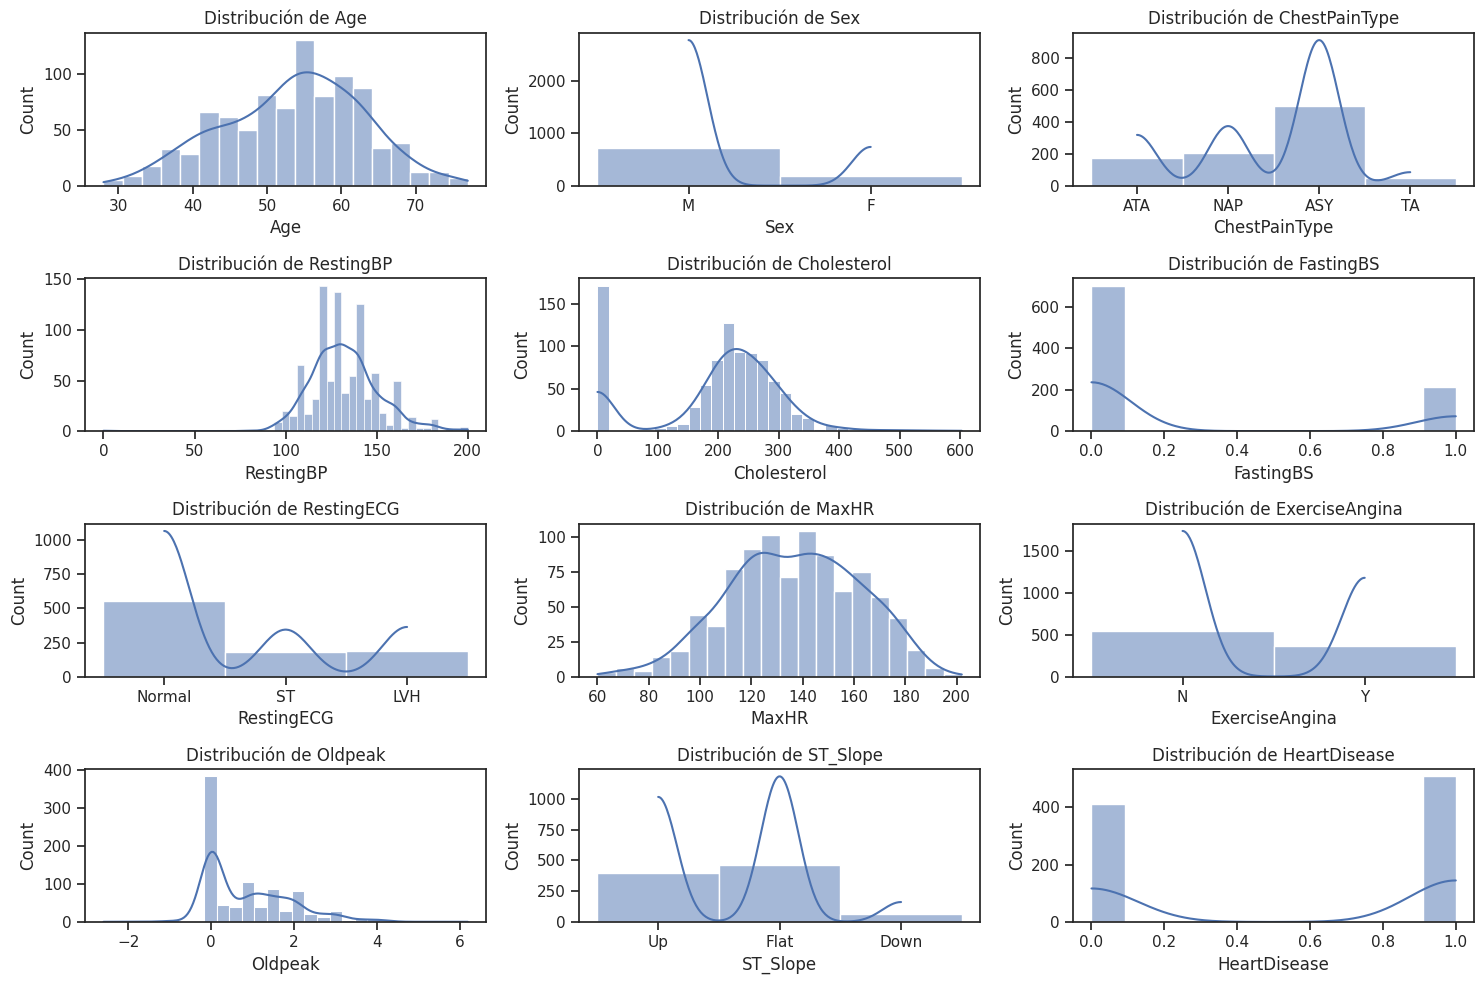

In [64]:
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
            'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina',
            'Oldpeak', 'ST_Slope', 'HeartDisease']

# Configurar el estilo de los gráficos
sns.set(style="ticks")

# Crear el gráfico de distribución
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

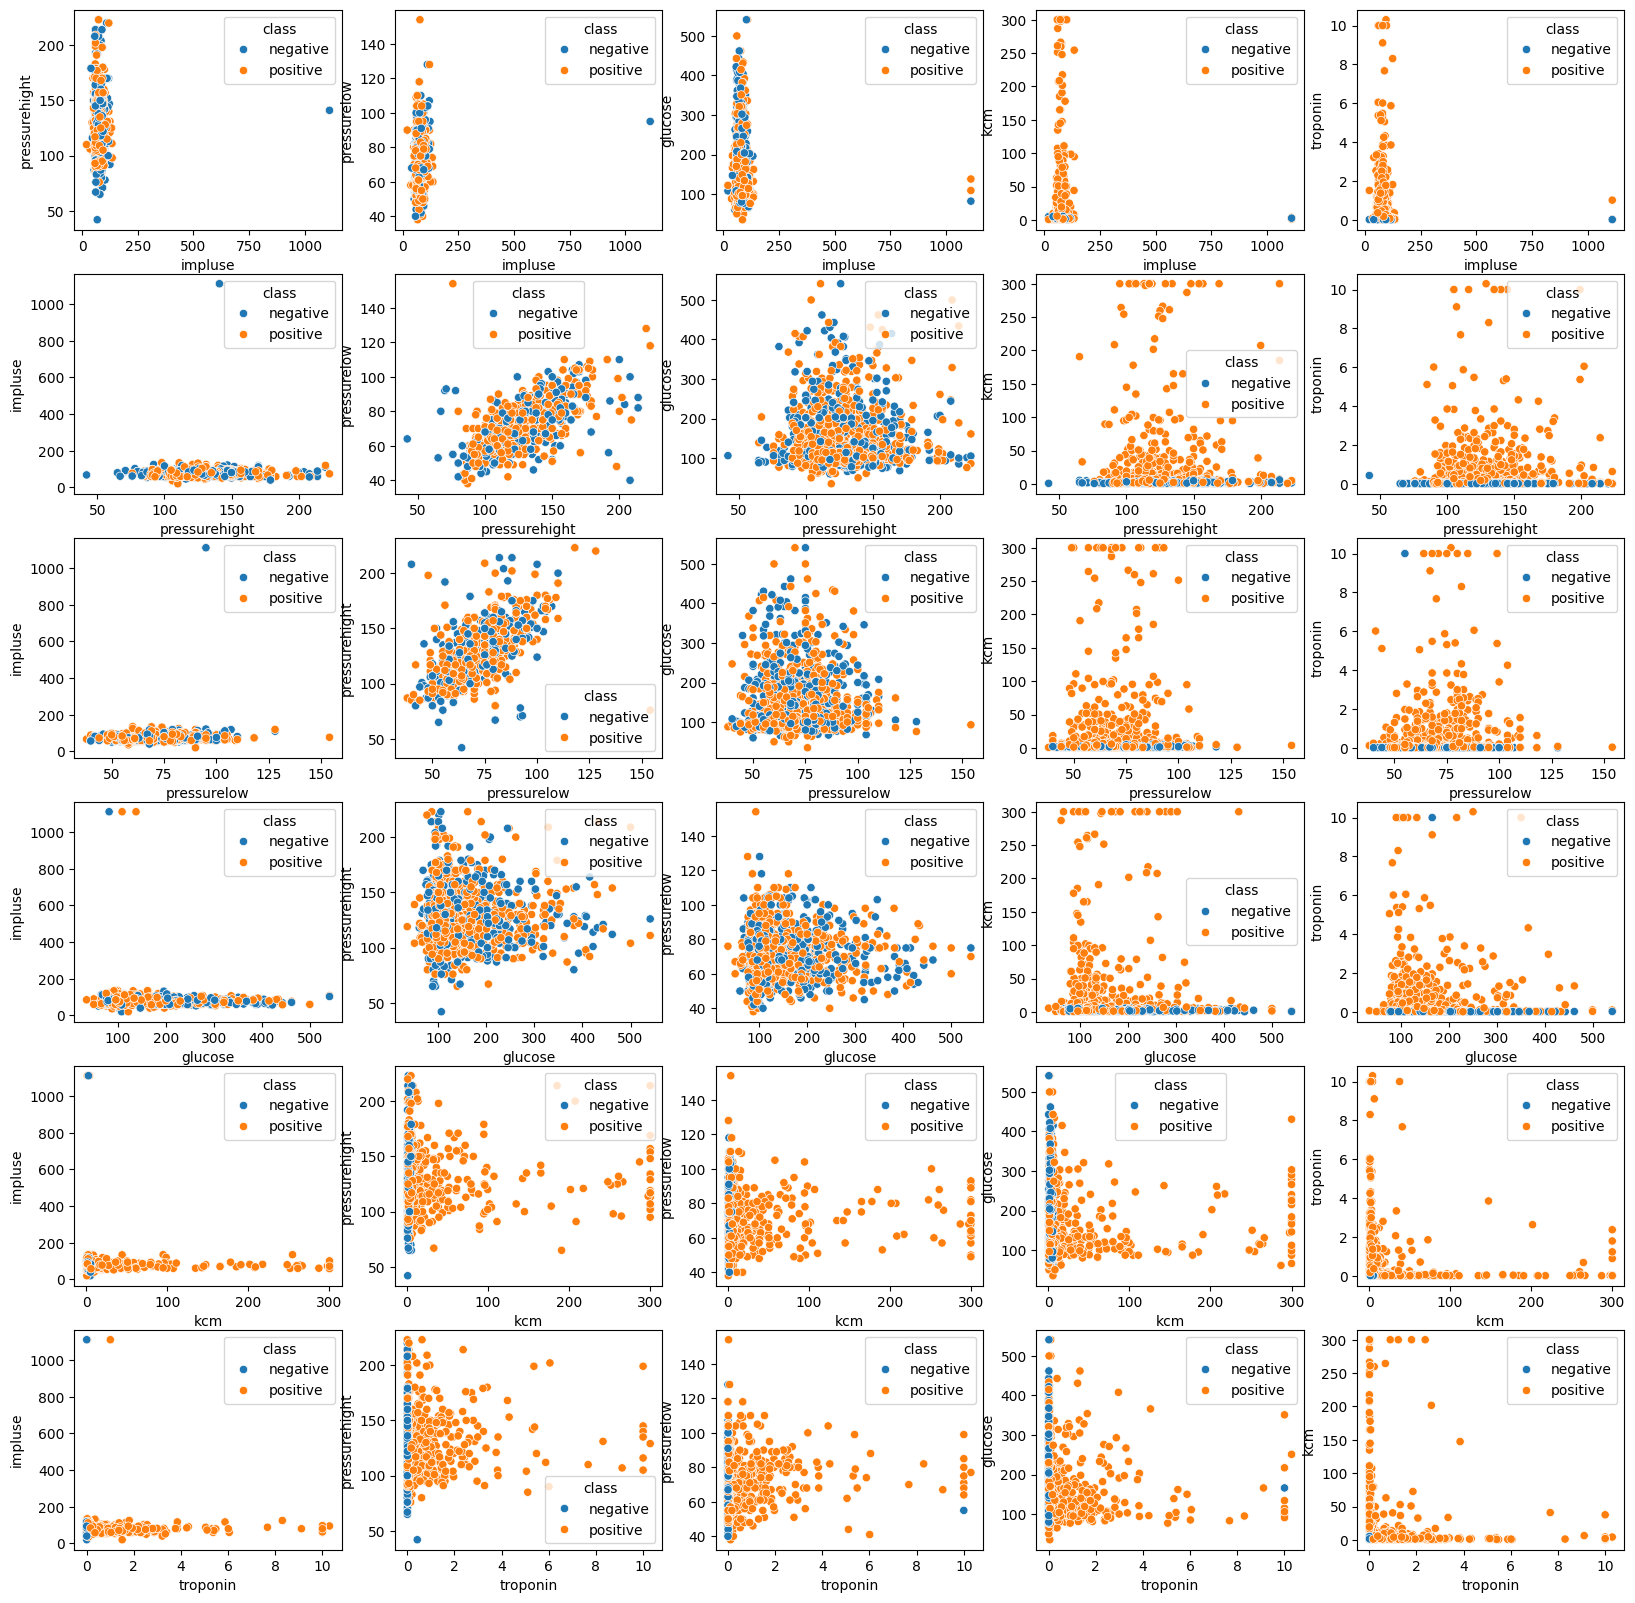

In [37]:
fig, axes = plt.subplots(6, 5, figsize=(20,20))
# show the relation between impluse and all columns According to class value (target) by using scatterplot
sns.scatterplot(ax=axes[0, 0],x="impluse",y="pressurehight",hue = "class",data=df)
sns.scatterplot(ax=axes[0, 1],x="impluse",y="pressurelow",hue = "class",data=df)
sns.scatterplot(ax=axes[0, 2],x="impluse",y="glucose",hue = "class",data=df)
sns.scatterplot(ax=axes[0, 3],x="impluse",y="kcm",hue = "class",data=df)
sns.scatterplot(ax=axes[0, 4],x="impluse",y="troponin",hue = "class",data=df)

# show the relation between pressurehight and all columns According to class value (target) by using scatterplot
sns.scatterplot(ax=axes[1, 0],x="pressurehight",y="impluse",hue = "class",data=df)
sns.scatterplot(ax=axes[1, 1],x="pressurehight",y="pressurelow",hue = "class",data=df)
sns.scatterplot(ax=axes[1, 2],x="pressurehight",y="glucose",hue = "class",data=df)
sns.scatterplot(ax=axes[1, 3],x="pressurehight",y="kcm",hue = "class",data=df)
sns.scatterplot(ax=axes[1, 4],x="pressurehight",y="troponin",hue = "class",data=df)

# show the relation between pressurelow and all columns According to class value (target) by using scatterplot
sns.scatterplot(ax=axes[2, 0],x="pressurelow",y="impluse",hue = "class",data=df)
sns.scatterplot(ax=axes[2, 1],x="pressurelow",y="pressurehight",hue = "class",data=df)
sns.scatterplot(ax=axes[2, 2],x="pressurelow",y="glucose",hue = "class",data=df)
sns.scatterplot(ax=axes[2, 3],x="pressurelow",y="kcm",hue = "class",data=df)
sns.scatterplot(ax=axes[2, 4],x="pressurelow",y="troponin",hue = "class",data=df)

# show the relation between glucose and all columns According to class value (target) by using scatterplot
sns.scatterplot(ax=axes[3, 0],x="glucose",y="impluse",hue = "class",data=df)
sns.scatterplot(ax=axes[3, 1],x="glucose",y="pressurehight",hue = "class",data=df)
sns.scatterplot(ax=axes[3, 2],x="glucose",y="pressurelow",hue = "class",data=df)
sns.scatterplot(ax=axes[3, 3],x="glucose",y="kcm",hue = "class",data=df)
sns.scatterplot(ax=axes[3, 4],x="glucose",y="troponin",hue = "class",data=df)

# show the relation between kcm and all columns According to class value (target) by using scatterplot
sns.scatterplot(ax=axes[4, 0],x="kcm",y="impluse",hue = "class",data=df)
sns.scatterplot(ax=axes[4, 1],x="kcm",y="pressurehight",hue = "class",data=df)
sns.scatterplot(ax=axes[4, 2],x="kcm",y="pressurelow",hue = "class",data=df)
sns.scatterplot(ax=axes[4, 3],x="kcm",y="glucose",hue = "class",data=df)
sns.scatterplot(ax=axes[4, 4],x="kcm",y="troponin",hue = "class",data=df)

# show the relation between troponin and all columns According to class value (target) by using scatterplot
sns.scatterplot(ax=axes[5, 0],x="troponin",y="impluse",hue = "class",data=df)
sns.scatterplot(ax=axes[5, 1],x="troponin",y="pressurehight",hue = "class",data=df)
sns.scatterplot(ax=axes[5, 2],x="troponin",y="pressurelow",hue = "class",data=df)
sns.scatterplot(ax=axes[5, 3],x="troponin",y="glucose",hue = "class",data=df)
sns.scatterplot(ax=axes[5, 4],x="troponin",y="kcm",hue = "class",data=df)
plt.show()